In [5]:
import pandas as pd
df = pd.read_csv('C:/Users/HP/Desktop/studies/SEMESTER-7/DA/lab_dataset/iris.csv')
df = df.drop('S.no',axis=1)


In [7]:
print(df.variety.dtype)

object


In [8]:
from sklearn import preprocessing

if df.variety.dtype == 'object':
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(df.variety.values))
    df.variety = lbl.transform(list(df.variety.values))
print(df.variety.dtype)


int64


In [9]:
from sklearn.model_selection import train_test_split
Y = df.variety.values
X = df.drop(['variety'],axis=1).values
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size= 0.20, random_state=27)


In [11]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
gnb = GaussianNB()
NaiveBayesModel = gnb.fit(x_train, y_train)
y_pred = NaiveBayesModel.predict(x_test)
accuracy_score(y_test, y_pred)


0.9

In [12]:
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(y_test,y_pred)
print(con_mat)


[[ 7  0  0]
 [ 0 10  1]
 [ 0  2 10]]


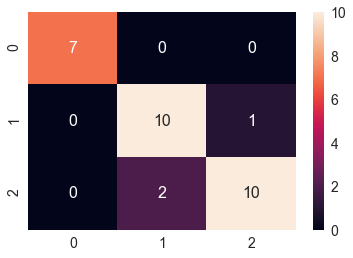

In [14]:
import seaborn as sn
sn.set(font_scale=1.4)
sn.heatmap(pd.DataFrame(con_mat), annot=True,annot_kws={"size": 16})


In [15]:
from sklearn import svm
from sklearn.metrics import average_precision_score
x_train, x_test, y_train, y_test = train_test_split(X[Y<2],Y[Y<2], test_size= 0.95)
classifier = svm.LinearSVC(random_state=27)
classifier.fit(x_train, y_train)
y_score = classifier.decision_function(x_test)
average_precision = average_precision_score(y_test, y_score)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))


Average precision-recall score: 1.00


In [17]:
import numpy as np
# Add noisy features
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]
x_train, x_test, y_train, y_test = train_test_split(X[Y<2],Y[Y<2], test_size= 0.20)


Average precision-recall score: 0.6143833298702424


Text(0,0.5,'Precision')

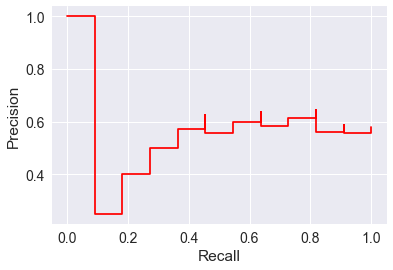

In [24]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
classifier = svm.SVC(kernel='linear', random_state=27)
classifier.fit(x_train, y_train)
y_score = classifier.decision_function(x_test)
print('Average precision-recall score:',average_precision_score(y_test, y_score))
precision, recall, _ = precision_recall_curve(y_test, y_score)
plt.step(recall, precision, color='r')
plt.xlabel('Recall')
plt.ylabel('Precision')


Average precision-recall score: 0.6065565700522076


Text(0,0.5,'Precision')

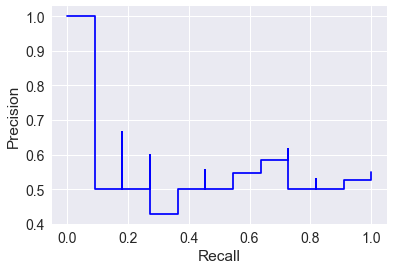

In [23]:
classifier = svm.SVC(kernel='poly', random_state=27)
classifier.fit(x_train, y_train)
y_score = classifier.decision_function(x_test)
print('Average precision-recall score:',average_precision_score(y_test, y_score))
precision, recall, _ = precision_recall_curve(y_test, y_score)
plt.step(recall, precision, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')


Average precision-recall score: 0.6204439359308485


Text(0,0.5,'Precision')

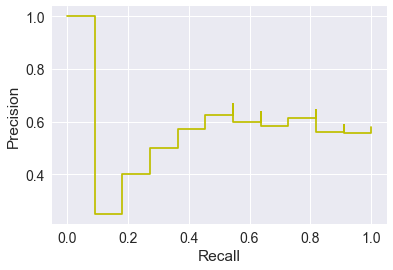

In [21]:
classifier = svm.SVC(kernel='rbf', random_state=27)
classifier.fit(x_train, y_train)
y_score = classifier.decision_function(x_test)
print('Average precision-recall score:',average_precision_score(y_test, y_score))
precision, recall, _ = precision_recall_curve(y_test, y_score)
plt.step(recall, precision, color='y')
plt.xlabel('Recall')
plt.ylabel('Precision')
